<a href="https://colab.research.google.com/github/Pipe-13/InteligenciaArtificial/blob/main/Parcial_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CARGA DEL DATASET**

In [70]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [73]:
df = pd.read_csv('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL/heart_disease_uci.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


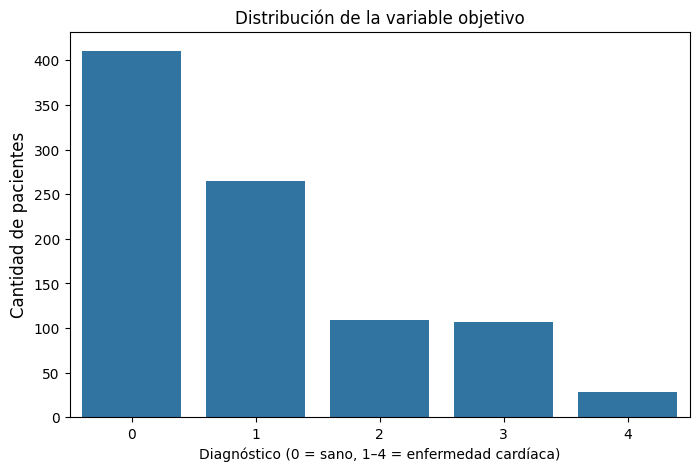

In [75]:
# Crear gráfico de conteo
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="num")

plt.title("Distribución de la variable objetivo",)
plt.xlabel("Diagnóstico (0 = sano, 1–4 = enfermedad cardíaca)")
plt.ylabel("Cantidad de pacientes", fontsize=12)

plt.show()

Se podrian decir que el dataframe esta ligeramente equilibrado ya que aproximadamente 500 casos son positivos y aproximadamente 400 no lo son

In [76]:
# Eliminar columnas
df = df.drop('ca', axis=1)
df = df.drop('thal', axis=1)
df = df.drop('id', axis=1)

# Dejar solo columnas numericas
df = df.select_dtypes(include=[np.number])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   trestbps  861 non-null    float64
 2   chol      890 non-null    float64
 3   thalch    865 non-null    float64
 4   oldpeak   858 non-null    float64
 5   num       920 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 43.3 KB


Las columnas 'ca' y 'thal' se eliminan debido a que tienen mas de la mitad de los valores nulos, y se dejan solo las columnas numericas para que el modelo funcione correctamente

In [77]:
# Imputar columna trestbps con la media
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['trestbps'].isnull().sum()

np.int64(0)

La columna se imputa con la media debido a que no posee muchos valores atipicos

In [78]:
# Imputar columna chol mediana
df['chol'] = df['chol'].fillna(df['chol'].median())
df['chol'].isnull().sum()

np.int64(0)

La columna se imputa con la mediana debido a que posee valores atipicos y no tiene una moda tan frecuente

In [79]:
# Imputar columna thalch mediana
df['thalch'] = df['thalch'].fillna(df['thalch'].median())
df['thalch'].isnull().sum()

np.int64(0)

La columna se imputa con la mediana debido a que posee valores atipicos y no tiene una moda tan frecuente

In [80]:
# Imputar columna oldpeak mediana
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())
df['oldpeak'].isnull().sum()

np.int64(0)


La columna se imputa con la media debido a que no posee muchos valores atipicos

In [81]:
# Separando carateristicas y target
target = df['num']
x_df = df.drop('num', axis=1)


La columna 'num' es el lo que se piensa predecir ya que es el grado de enfermedad cardiaca, donde 0 es sano y 1-4 representa el grado de la enfermedad

In [82]:
# Separacion de datos de prueba y entrenamiento
x_train, x_test, target_train, target_test = train_test_split(x_df, target, test_size=0.20, random_state=42)


In [83]:
# Escalamiento de datos con StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [84]:
# Creacion y entrenamiento del modelo de LogisticRegression
model = LogisticRegression()
model.fit(x_train, target_train)

LogisticRegression()

Exactitud del modelo: 47.28%


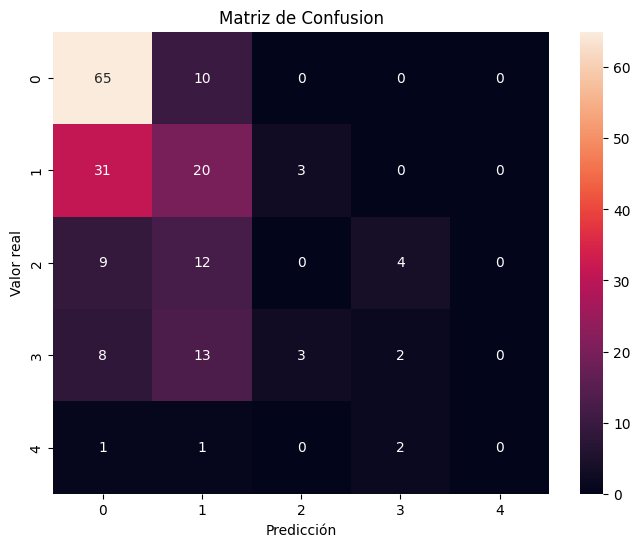

In [85]:
# Prediccion y metricas de rendimiento
target_pred = model.predict(x_test)

accuracy = accuracy_score(target_test, target_pred)
print(f"Exactitud del modelo: {accuracy:.2%}")

cnf_mtrx = confusion_matrix(target_test, target_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cnf_mtrx, annot=True)
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusion")
plt.show()

De acuerdo con los resultados obtenidos, podemos concluir lo siguiente:

El modelo alcanzó una exactitud del 47%, lo que indica que aproximadamente la mitad de sus predicciones son correctas.

En cuanto a la matriz de confusión, se observa que el modelo predijo correctamente 65 casos negativos, mientras que en 10 ocasiones confundió casos negativos con el nivel 1 de gravedad. En el caso de los positivos, el modelo muestra una alta tasa de confusión entre los distintos niveles de gravedad.

Por ejemplo, para los casos etiquetados como nivel 1, se presentaron 31 falsos negativos, siendo estos confundidos con casos negativos. A medida que aumenta la gravedad (niveles más altos), la tasa de confusión también incrementa.

El modelo tiene un buen desempeño al identificar si un paciente es negativo, pero presenta dificultades al clasificar correctamente los casos positivos según su nivel de gravedad. Sin embargo, puede considerarse aceptable en términos de detección general de positividad, aunque tiende a confundir especialmente los casos de nivel 1.

In [86]:
target_test.value_counts()

,count
num,
0,75
1,54
3,26
2,25
4,4


In [87]:
target_pred = pd.Series(target_pred)
target_pred.value_counts()

,count
0,114
1,56
3,8
2,6
